<a href="https://colab.research.google.com/github/spiderpupa/traditional-mongolic-handwritten/blob/main/traditional_mongolic_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle에서 공유된 데이터셋은 .mat 확장자로 되어있으나, 해당 확장자를 다루는 데에는 전용 프로그램이 필요하고 이를 다뤄본 적이 없어 부득이 다른 형태로 전환할 필요가 있다. 또한 10만 개의 데이터셋을 한꺼번에 불러와 다룰 경우 메모리 초과가 일어날 가능성이 높아 우선 이를 이미지 파일로 분할하여 저장한 후, 데이터 학습 과정에서 따로따로 불러오는 형태로 진행한다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 분할 저장

## 라이브러리 로드

In [2]:
import scipy.io as sio
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread


## 데이터 불러오기 및 분할

In [5]:
data=sio.loadmat('/content/drive/MyDrive/mhw/data/Trainset.mat')
print("\nTrainset.mat")
print('dtype: ', type(data))
for i in data.keys():
    print('label name: "{name}", item quantity: {length}'.format(name=i, length=len(data[i])))


Trainset.mat
dtype:  <class 'dict'>
label name: "__header__", item quantity: 76
label name: "__version__", item quantity: 3
label name: "__globals__", item quantity: 0
label name: "train_data", item quantity: 100000


경로 설정 및 가장 큰 이미지 길이 찾기

In [6]:
def imageFile(n):
    return(data["train_data"][n][0])
    
lengthlist=[]
for i in range(len(data["train_data"])):
    lengthlist.append(imageFile(i).shape[0])

print('가장 긴 이미지 파일의 길이:', max(lengthlist),'px')

가장 긴 이미지 파일의 길이: 299 px


이미지 크기 맞추기

In [ ]:
# 패딩용 배열
a = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ]])
#저장 경로 설정
def outputPath(n):
    return('/content/drive/MyDrive/mhw/data/images/trainset_images/img%d.png' %(n+1))

# 299*48 사이즈에 맞춰 패딩 추가 후 png로 저장
for i in range(len(data["train_data"])):
    image=(imageFile(i))
    dataReshaped=(image.reshape(1,image.shape[0]*48))
    # 패딩 크기 설정
    margin=(299-image.shape[0])/2
    # 나눈 값이 정수가 아닐 경우 위를 1 짧게, 아래를 1 길게 
    if margin%1==0:
        upper_padding=int(margin)
        lower_padding=int(margin)
    else:
        upper_padding=int(margin-0.5)
        lower_padding=int(margin+0.5)
    
    # 저장용 배열
    img=np.array([])
    upper_margin=np.array([])
    lower_margin=np.array([])
    #패딩 만들기
    for j in range(upper_padding):     
        upper_margin = np.append(a,upper_margin)
    for k in range(lower_padding):
        lower_margin = np.append(a,lower_margin)
    # 패딩 붙이기
    img=np.append(upper_margin,dataReshaped)
    img=np.append(img,lower_margin)
    # 299*48 사이즈로 변형
    img=img.reshape(299,48)
    #png로 저장
    matplotlib.image.imsave(outputPath(i), img, cmap='gray')


## 처리한 파일 확인 및 잔여 데이터 지우기

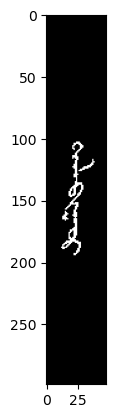

In [ ]:
image_1 = imread(outputPath(0))
# plot raw pixel data
plt.imshow(image_1)
# show the figure
plt.show()

데이터 지우기

In [ ]:
del(data)
del(lengthlist)
del(a)
del(image)
del(dataReshaped)
del(margin)
del(upper_padding)
del(lower_padding)
del(upper_margin)
del(lower_margin)
del(img)

# 라벨링

## 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import cv2
from keras.utils import to_categorical, Sequence


## 트레인셋 라벨링

### 라벨 매칭

In [ ]:
# Trainset_label.txt 불러오기
trainset_labels=['image','labels']
with open('D:/VS_Code_Workspace/mhw/Data/labels/Trainset_label.txt', 'r', encoding='utf-16 le') as label:
    for i in range(100000):
        line=str(label.readline())
        line=line.replace('\ufeff', '')
        line=line.replace('\n', '')
        trainset_labels.append('img%d.png' %(i+1))
        trainset_labels.append(line)
    label.close()

# 형태 재설정
trainset_labels=np.array(trainset_labels)
trainset_labels=trainset_labels.reshape(100001,2)
trainset_labels=pd.DataFrame(trainset_labels)

# csv 파일로 저장
trainset_labels.to_csv('D:/VS_Code_Workspace/mhw/Data/labels/trainset_label.csv', 
                        index=False, 
                        header=False)

잔여 데이터 지우기

In [ ]:
del(trainset_labels)

확인용

In [ ]:
dataset=pd.read_csv('D:/VS_Code_Workspace/mhw/Data/labels/trainset_label.csv')
print(dataset.shape)
dataset

(100000, 2)


,image,labels
0,img1.png,ᠲᠠᠯᠪᠢᠭᠤᠷ
1,img2.png,ᠪᠣᠰᠤᠭᠠᠳᠠ
2,img3.png,ᠯᠣᠭᠢᠺᠴᠢ
3,img4.png,ᠣᠯᠣᠭᠠᠶᠢᠯᠠ
4,img5.png,ᠪᠤᠰᠠᠭ
...,...,...
99995,img99996.png,ᠤᠭᠲᠤᠮᠠᠯ
99996,img99997.png,ᠺᠣᠮᠠᠨᠳ᠋ᠯᠠᠯ
99997,img99998.png,ᠰᠤᠷᠴᠢᠬ᠎ᠠ
99998,img99999.png,ᠪᠠᠷᠠᠭᠳᠠᠯ


## 학습

### 라이브러리 불러오기

In [ ]:
from keras import layers, models, utils
from keras.models import load_model
from keras.utils import to_categorical, Sequence
import os
import tensorflow as tf

### 데이터생성기 클래스

In [ ]:
class DataGenerator(Sequence):
    def __init__(self, path, list_IDs, labels,img_sizeX, img_sizeY,
    batch_size, img_channel, num_classes):
     
        # 데이터셋 경로
        self.path = path
        # 데이터 이미지 개별 주소 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.list_IDs = list_IDs
        # 데이터 라벨 리스트 [ DataFrame 형식 (image 주소, image 클래스) ]
        self.labels = labels
        # 가로 크기
        self.img_sizeX = img_sizeX
         # 세로 크기
        self.img_sizeY = img_sizeY
        # 학습 Batch 사이즈
        self.batch_size = batch_size
        # 이미지 채널 [RGB or Gray]
        self.img_channel = img_channel
        # 데이터 라벨의 클래스 수
        self.num_classes = num_classes
        # 전체 데이터 수
        self.indexes = np.arange(len(self.list_IDs))
   
    def __len__(self):
        len_ = int(len(self.list_IDs)/self.batch_size)
        if len_*self.batch_size < len(self.list_IDs):
            len_ += 1
        return len_
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation(list_IDs_temp)
        return X, y
            
    def __data_generation(self, list_IDs_temp):
        X = np.zeros((self.batch_size, self.img_sizeX, self.img_sizeY, self.img_channel))
        y = np.zeros((self.batch_size, self.num_classes), dtype=int)
        for i, ID in enumerate(list_IDs_temp):
            img = cv2.imread(self.path+ID)
            X[i, ] = img
            y[i, ] = to_categorical(self.labels[i], num_classes=self.num_classes)
        return X, y

### 데이터셋 전처리

In [ ]:
# 이미지 주소 및 클래스 라벨 파일 불러오기
train_labels = pd.read_csv('D:/VS_Code_Workspace/mhw/Data/labels/trainset_label.csv')

# 라벨 정보 전처리
# 전체 클래스 수
clss_num = len(train_labels['labels'].unique())
# 클래스 -> 숫자로 변환 (카테고리 형식의 클래스를 원 핫 인코딩)
labels_dict = dict(zip(train_labels['labels'].unique(), range(clss_num)))
train_labels = train_labels.replace({"labels": labels_dict})
img_sizeX = 299
img_sizeY = 48
img_ch = 1
num_class = 5000
batch_size = 32

train_generator = DataGenerator('D:/VS_Code_Workspace/mhw/Data/images/trainset_images', train_labels['image'],
                                train_labels['labels'],
                                img_sizeX, img_sizeY,
                                batch_size, 
                                img_ch, num_class)

### 모델 설정

In [ ]:
model=models.Sequential()

In [ ]:
#인코딩
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(299, 48, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
#디코딩
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5000, activation='softmax'))

In [ ]:
#모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 295, 46, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 23, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 145, 21, 128)      73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 8, 256)        295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 4, 256)       0

### 학습 진행

In [ ]:
checkpoint_path = 'D:/VS_Code_Workspace/mhw/Data/models/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )  # 5번째 에포크마다 가중치를 저장

In [ ]:
#학습과정 설정
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, epochs=1)

C:\Users\astmd\AppData\Local\Temp\ipykernel_9508\2210781927.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=1)


: 

: 